In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme() # Comment this line out when planning to generate the last plot

In [2]:
import requests
import hashlib
import os
from multiprocessing import Pool
import time
import pandas as pd
from bs4 import BeautifulSoup

# Importing Our Data

In [11]:
# Untar and import the commit-visualzation CSV as a dataframe

!tar -xzvf commit-visualization.tar.gz
df_vis = pd.read_csv('commit-visualization.csv')

commit-visualization.csv


In [8]:
# Import the final version of the df_commits from the data collection notebook
df_enterprise = pd.read_csv('/content/master_df.csv')

# Generating Our Visualizations

#### Commit count of Fortune 500 projects vs non-Fortune 500

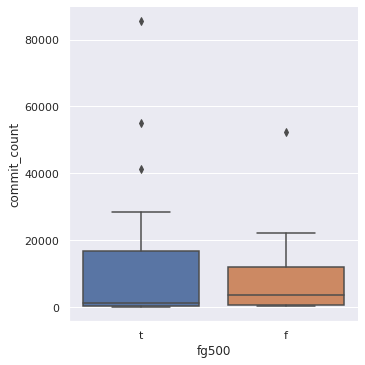

In [15]:
# Create boxplot comparing commit count between Fortune 500 and non-Fortune 500 projects
sns.catplot(x="fg500", y="commit_count", kind="box", data=df_enterprise)

#### 10 most used languages across top 100 projects
 
Note: There will be projects that overlap across categories as they may make use of more than one language

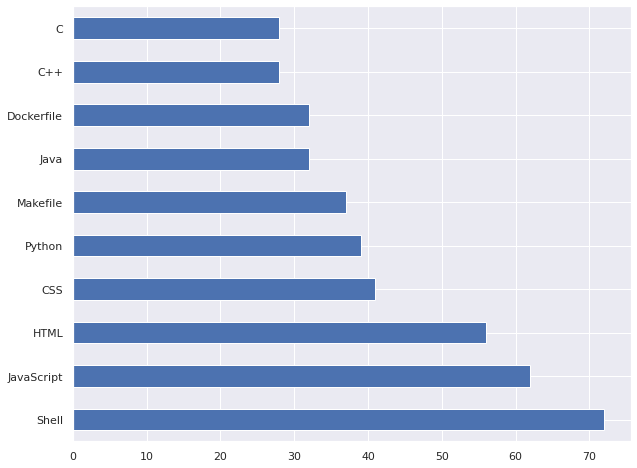

In [16]:
plt.figure(figsize=(10,8))

# Create a bar graph demonstrating the top ten most common languages among the projects
df_enterprise.loc[:,'TypeScript':'Liquid'].notna().sum().sort_values(ascending=False)[:10].plot.barh()

#### Pull requests of Fortune 500 and non-Fortune 500 companies as determined by star_number and commit_count

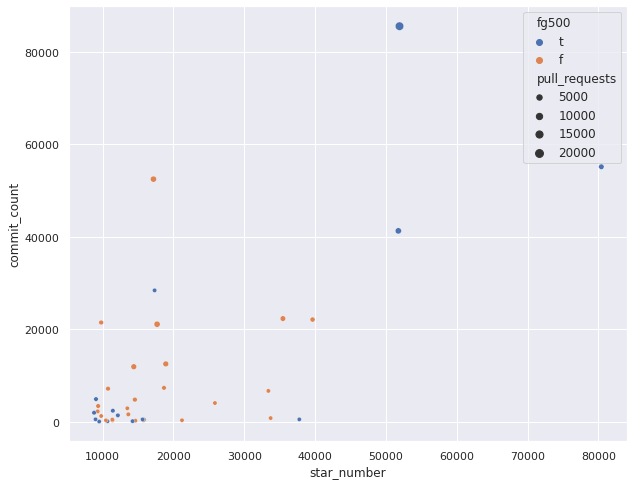

In [17]:
plt.figure(figsize=(10,8))

# Create a scatterplot comparing Fortune 500 and non-Fortune 500 projects' star counts, 
# commit_counts, and number of pull requests
sns.scatterplot(data=df_enterprise,x='star_number',y='commit_count',
                size='pull_requests',
                hue='fg500')

#### Comparing total project contributions based on number of contributors, followers, and owning company

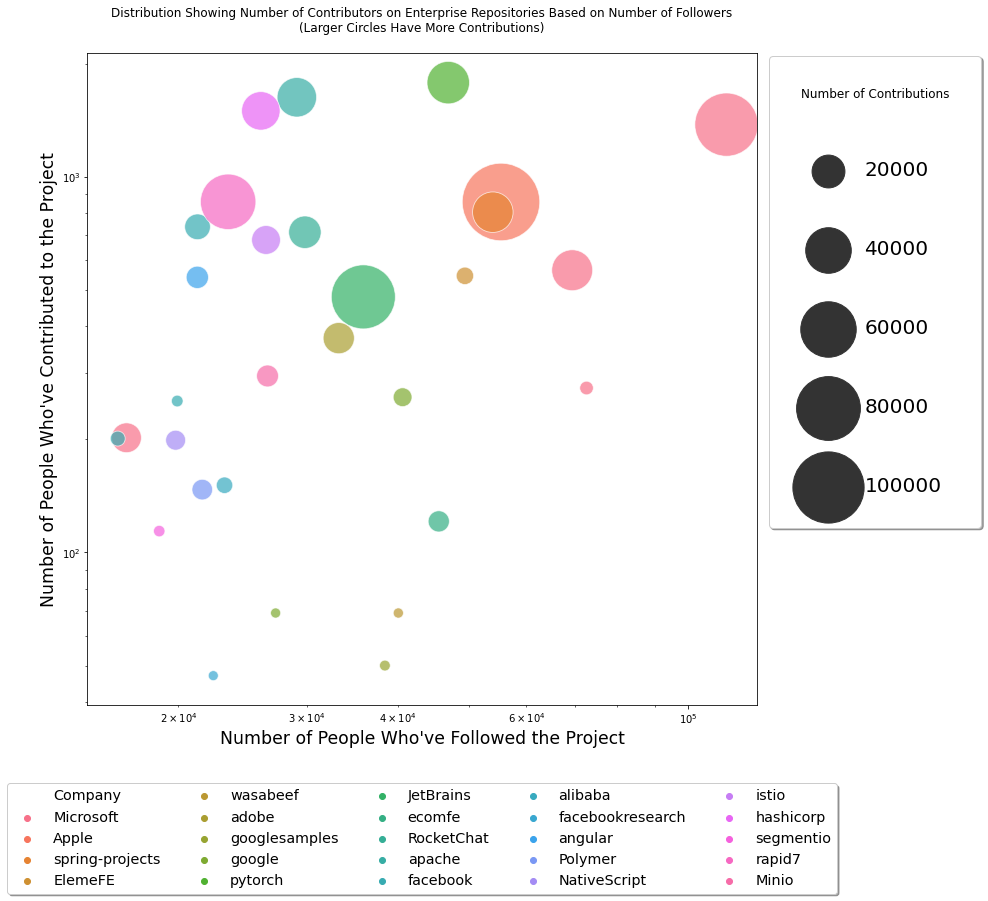

In [6]:
# Create the axes and plot of the correct size
fig, ax = plt.subplots(figsize=(12,12))

# Plot the data onto the axes
ax = sns.scatterplot(x='Followers', y='Contributors', hue='Company', size='Commits', data=df_vis, ax=ax, sizes = (100,6000), alpha=.7)

# Get the legend information to create our own
h,l = ax.get_legend_handles_labels()

# Set log scale to reduce scattering, so we can better compare individual markers
ax.set(xscale="log", yscale="log")

plt.ylabel('Number of People Who\'ve Contributed to the Project', fontsize='xx-large')
plt.xlabel('Number of People Who\'ve Followed the Project', fontsize='xx-large')

ax.set_title('Distribution Showing Number of Contributors on Enterprise Repositories Based on Number of Followers\n(Larger Circles Have More Contributions)\n')

# Create a legend for companies
col_lgd = plt.legend(h[:25], l[:25], loc='lower center', 
                     bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=5, fontsize='x-large')

# Create a legend for number of contributors
size_lgd = plt.legend(h[-5:], l[-5:], loc='upper right', borderpad=1.6, prop={'size': 20},
                      bbox_to_anchor=(1.35,1.011), labelspacing=3, fancybox=True, title="Number of Contributions", title_fontsize='large', shadow=True, ncol=1)

plt.gca().add_artist(col_lgd)

# Create a plot comparing the number of contributions a project receives based on the 
# the number of contributors and the number of people who follow the project. 
# Color separated to show potential correlations on a per-company basis.
plt.show()